<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Introduction_to_Statistical_Learning/DataStory_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse Advertising Data
## Ask Questions
General | Specific
--- | ---
Can we determine if a relationship exists between predictors and response? | Is there a relationship between advertising budget and sales?
How strong is this relationship? | How strong is the relationship between advertising budget and sales?
Which predictors are related to response? | Which media are associated with sales?
How large is the association between each predictor and response? | How large is the association between each medium and sales?
How accurate are predictions once model is fit? | How accurately can we predict future sales?
Is a linear model appropriate? | Is the relationship linear?
Are there interaction effects? | Is there synergy among the advertising media?

## Wrangle Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = 'https://raw.githubusercontent.com/tdpetrou/Machine-Learning-Books-With-Python/master/Introduction%20to%20Statistical%20Learning/data/'
adv = pd.read_csv(path+'Advertising.csv')
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Explore Data

poly([7.03259355 0.04753664])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


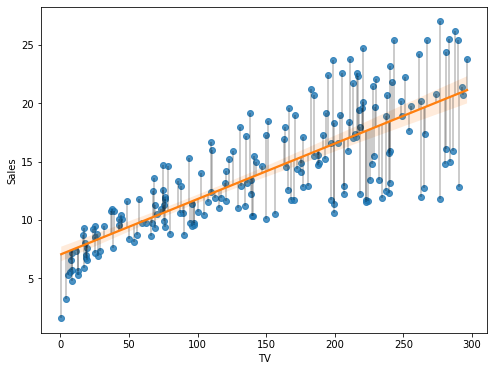

In [3]:
# This forms part of old polynomial API. Since version 1.4, the new polynomial API defined in numpy.polynomial is preferred.
# fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
# y_hat = fit[1] + adv['TV'] * fit[0]

# Use `convert()` to get the coefficients in the unscaled data domain
fit = Polynomial.fit(adv['TV'], adv['Sales'], deg = 1).convert()
print(fit)
y_hat = fit.coef[0] + fit.coef[1] * adv['TV'] 

plt.figure(figsize=(8, 6))
sns.regplot('TV', 'Sales', data=adv, line_kws={'color':'tab:orange'})
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

In [4]:
import statsmodels.api as sm
# Using numpy arrays instead of formula
adv = sm.add_constant(adv)
print(sm.OLS(adv['Sales'], adv[['const', 'TV']]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        07:01:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [5]:
# Using R-style formulas with formula.api
print(smf.ols('Sales ~ TV', data=adv).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        07:01:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

## References
- [np.polyfit: transition guide](https://numpy.org/doc/stable/reference/routines.polynomials.html)
- [np.Polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html#numpy.polynomial.polynomial.Polynomial)